데이터 시각화를 위해 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
df_PCOS = pd.read_csv('../Data/pcos.csv')
df_PCOS.head()

,PCOS,Age,Weight,Height,BMI,Blood Type,Pulse rate,Cycle length,Marraige Status,Pregnant,...,Waist:Hip Ratio,Weight gain,hair growth,Skin darkening,Hair loss,Pimples,Fast food,Reg.Exercise,BP_Systolic,BP_Diastolic
0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,5.0,7.0,0.0,...,0.833333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0
1,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,5.0,11.0,1.0,...,0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0
2,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,5.0,10.0,1.0,...,0.900000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0
3,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,5.0,4.0,0.0,...,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0
4,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,5.0,1.0,1.0,...,0.810811,0.0,0.0,0.0,1.0,0.0,0.0,0.0,120.0,80.0


In [3]:
df_PCOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             541 non-null    float64
 1   Age              541 non-null    float64
 2   Weight           541 non-null    float64
 3   Height           541 non-null    float64
 4   BMI              541 non-null    float64
 5   Blood Type       541 non-null    float64
 6   Pulse rate       541 non-null    float64
 7   Cycle length     541 non-null    float64
 8   Marraige Status  541 non-null    float64
 9   Pregnant         541 non-null    float64
 10  aborptions       541 non-null    float64
 11  Hip              541 non-null    float64
 12  Waist            541 non-null    float64
 13  Waist:Hip Ratio  541 non-null    float64
 14  Weight gain      541 non-null    float64
 15  hair growth      541 non-null    float64
 16  Skin darkening   541 non-null    float64
 17  Hair loss       

# 상관계수를 heatmap으로 표현하기

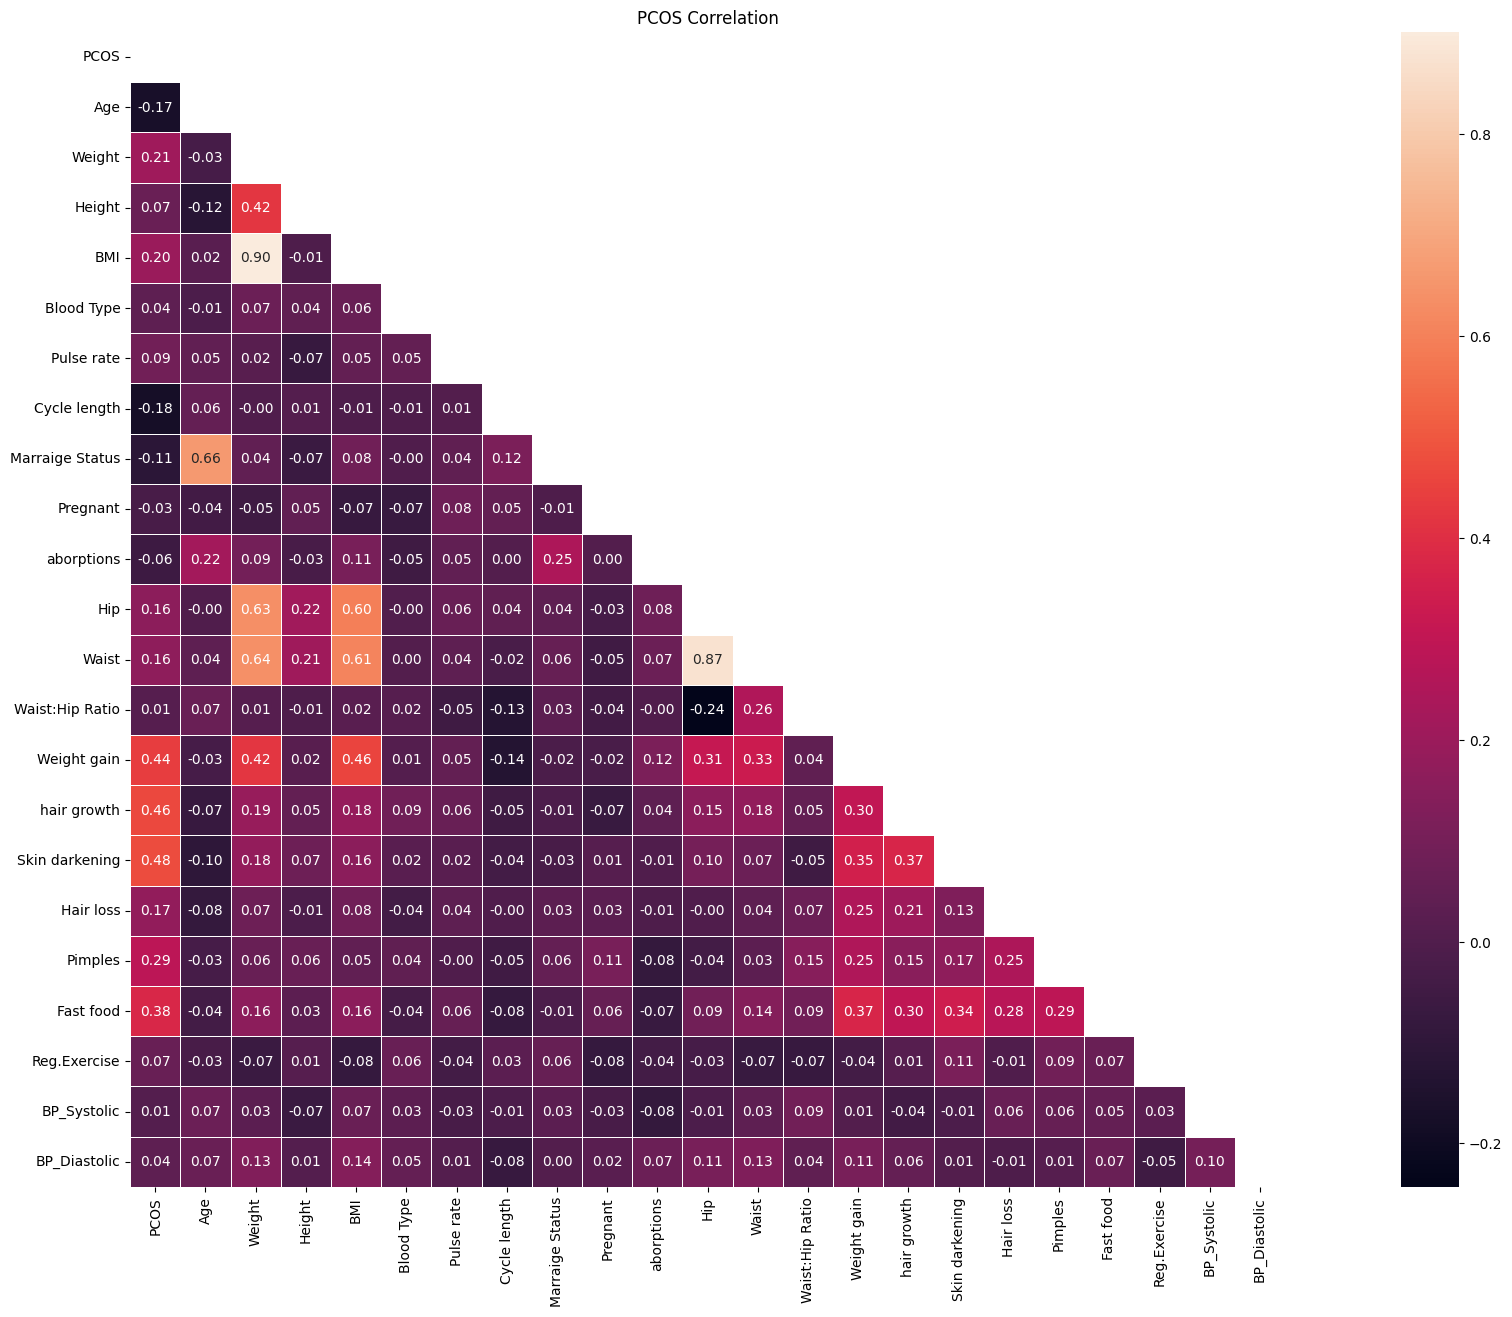

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

matrix = df_PCOS.corr()


plt.figure(figsize=(30,15))

# heatmap 절반만 보여주게 하기.
mask = np.zeros_like(matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(
    matrix,
     annot=True,
     mask=mask,
     linewidths= 0.5,
     square=True,
     fmt= '.2f'

     )
plt.title('PCOS Correlation')
plt.show()

PCOS와 나머지 칼럼의 상관계수를 절대값을 씌워 내림차순으로 보여주었다.

In [5]:
abs(df_PCOS.corr()['PCOS']).sort_values(ascending=0)

PCOS               1.000000
Skin darkening     0.475733
hair growth        0.464667
Weight gain        0.441047
Fast food          0.376183
Pimples            0.286077
Weight             0.211938
BMI                0.199534
Cycle length       0.178480
Hair loss          0.172879
Age                0.168513
Waist              0.164598
Hip                0.162297
Marraige Status    0.113056
Pulse rate         0.091821
Height             0.068254
Reg.Exercise       0.065337
aborptions         0.057158
BP_Diastolic       0.038032
Blood Type         0.036433
Pregnant           0.027565
Waist:Hip Ratio    0.012386
BP_Systolic        0.007942
Name: PCOS, dtype: float64

In [6]:
df_value_counts = df_PCOS['PCOS'].value_counts()
df_value_counts

0.0    364
1.0    177
Name: PCOS, dtype: int64

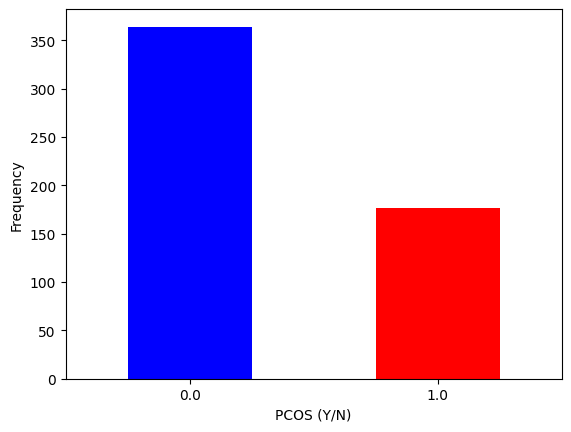

In [7]:
df_value_counts.plot(
    kind='bar',
    rot=0,
    color = ['blue','red']
)
plt.xlabel("PCOS (Y/N)")
plt.ylabel("Frequency")
plt.show()

In [8]:
df_PCOS.columns.unique()

Index(['PCOS', 'Age', 'Weight', 'Height', 'BMI', 'Blood Type', 'Pulse rate',
       'Cycle length', 'Marraige Status', 'Pregnant', 'aborptions', 'Hip',
       'Waist', 'Waist:Hip Ratio', 'Weight gain', 'hair growth',
       'Skin darkening', 'Hair loss', 'Pimples', 'Fast food', 'Reg.Exercise',
       'BP_Systolic', 'BP_Diastolic'],
      dtype='object')

### 산포도로 데이터가 좋은지 알아보기

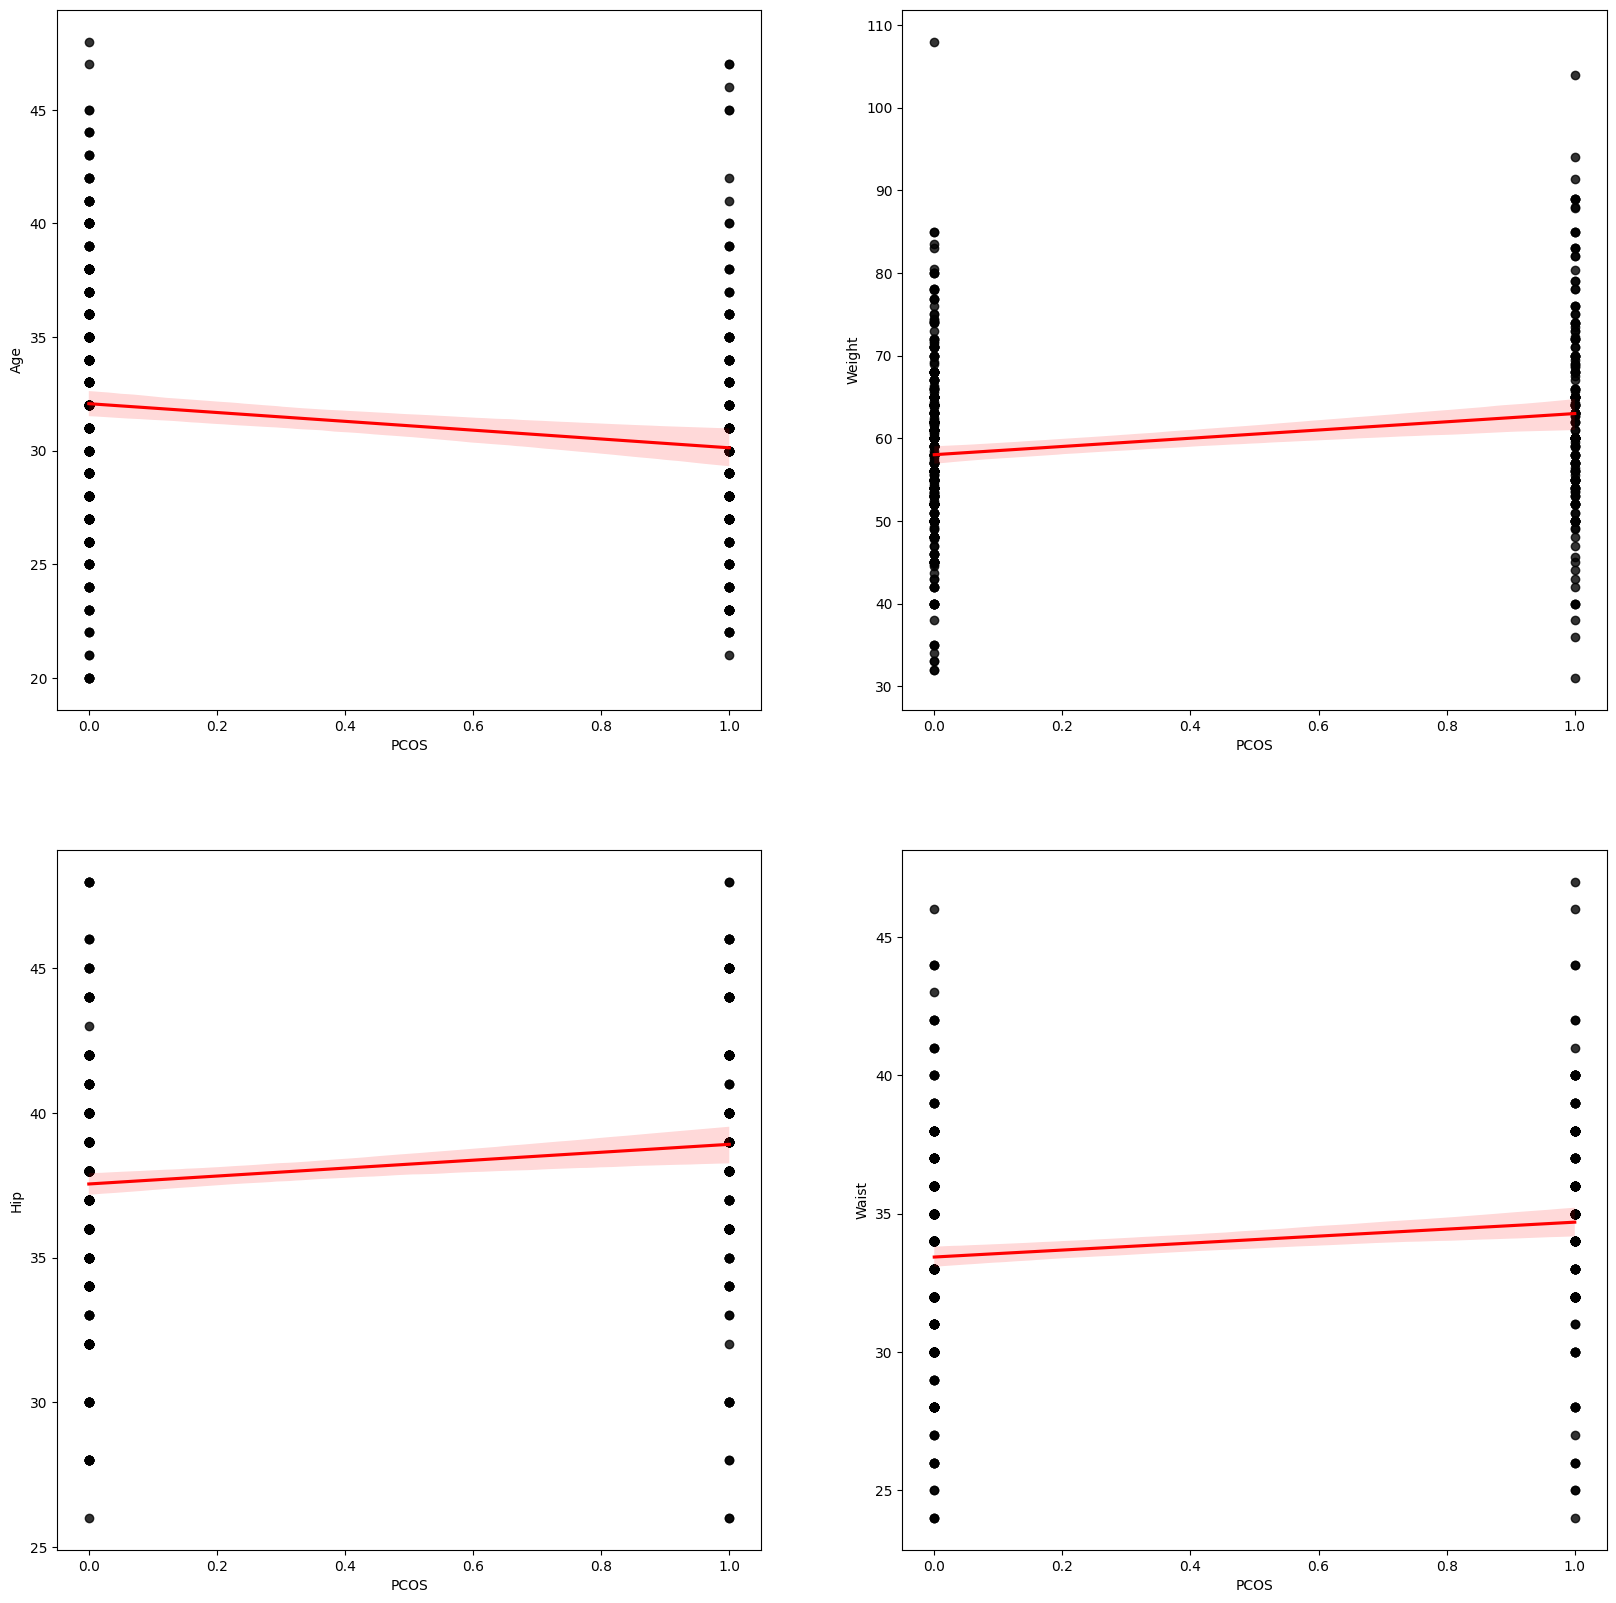

In [9]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 선형회귀선 표시
sns.regplot(
    x ='PCOS',
    y='Age',
    data=df_PCOS,
    scatter_kws={'color':'black'}, # scatter color
    line_kws={'color':'red'}, #regression line color
    ax=ax1,
    fit_reg=True # 선형 회귀선을 보이게 함. 기본값이 True. 즉 False를 안써주면 보임

)

sns.regplot(
    x ='PCOS',
    y='Weight',
    data=df_PCOS,
    scatter_kws={'color':'black'}, # scatter color
    line_kws={'color':'red'}, #regression line color
    ax=ax2,
    fit_reg=True # 선형 회귀선을 보이게 함. 기본값이 True. 즉 False를 안써주면 보임

)

sns.regplot(
    x ='PCOS',
    y='Hip',
    data=df_PCOS,
    scatter_kws={'color':'black'}, # scatter color
    line_kws={'color':'red'}, #regression line color
    ax=ax3,
    fit_reg=True # 선형 회귀선을 보이게 함. 기본값이 True. 즉 False를 안써주면 보임

)

sns.regplot(
    x ='PCOS',
    y='Waist',
    data=df_PCOS,
    scatter_kws={'color':'black'}, # scatter color
    line_kws={'color':'red'}, #regression line color
    ax=ax4,
    fit_reg=True # 선형 회귀선을 보이게 함. 기본값이 True. 즉 False를 안써주면 보임

)

plt.show()

#선에 퍼짐이 있는것은 데이터가 적어서 오차가 있을 수 있다는 의미

---
### 데이터를 직접 확인해서 쓸만한 컬럼들을 셀렉하기
---

In [10]:
df_PCOS.columns.unique()

Index(['PCOS', 'Age', 'Weight', 'Height', 'BMI', 'Blood Type', 'Pulse rate',
       'Cycle length', 'Marraige Status', 'Pregnant', 'aborptions', 'Hip',
       'Waist', 'Waist:Hip Ratio', 'Weight gain', 'hair growth',
       'Skin darkening', 'Hair loss', 'Pimples', 'Fast food', 'Reg.Exercise',
       'BP_Systolic', 'BP_Diastolic'],
      dtype='object')

- PCOS : Polycystic ovary syndrome (PCOS) is a hormonal disorder common among women of reproductive age, we would like to determine whether the patient has this syndrome or not
- Age (yrs) : Age of patient in years
- Weight (Kg) : Weight of patient in kg
- Height(Cm) : Height of patient in centimeter
- BMI : Body mass index of the patient
- Blood Type : Blood Group of the patient A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18 (total 8 blood groups)
- Pulse rate(bpm) : It is the heart rate of patient in beats per minute. Resting heart rate for adults ranges from 60 to 100 beats per minute
- RR (breaths/min) : It is the respiration rate. Normal respiration rates for an adult person at rest range from 12 to 16 breaths per minute.
- Cycle length(days) : This represents length of menstrual cycle. The length of the menstrual cycle varies from woman to woman, but the average is to have periods every 28 days.
- Marraige Status (Yrs) : Years of marriage
- Pregnant(Y/N) : If the patient is pregnant
- No. of aborptions : No. of aborptions, if any. There are total 541 values out of which 437 patients never had any abortions.
- Hip(inch) : Hip size in inches
- Waist(inch) : Waist Size in inches
- Waist:Hip Ratio : Waist by hip ratio
- Weight gain(Y/N): Is there been a weight gain
- hair growth(Y/N): Is there been a hair growth
- Skin darkening (Y/N): Skin darkening issues
- Hair loss(Y/N): hair loss issues
- Pimples(Y/N): pimples issues
- Fast food (Y/N): is fast food part of you diet
- Reg.Exercise(Y/N): do you do exercises on a regular basis
- BP _Systolic (mmHg): Systolic blood pressure, measures the pressure in your arteries when your heart beats.
- BP _Diastolic (mmHg): Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.

In [11]:
df_PCOS.head(10)

,PCOS,Age,Weight,Height,BMI,Blood Type,Pulse rate,Cycle length,Marraige Status,Pregnant,...,Waist:Hip Ratio,Weight gain,hair growth,Skin darkening,Hair loss,Pimples,Fast food,Reg.Exercise,BP_Systolic,BP_Diastolic
0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,5.0,7.0,0.0,...,0.833333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0
1,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,5.0,11.0,1.0,...,0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0
2,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,5.0,10.0,1.0,...,0.900000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0
3,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,5.0,4.0,0.0,...,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0
4,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,5.0,1.0,1.0,...,0.810811,0.0,0.0,0.0,1.0,0.0,0.0,0.0,120.0,80.0
5,0.0,36.0,74.1,165.0,27.217631,15.0,78.0,5.0,8.0,1.0,...,0.863636,1.0,0.0,0.0,1.0,0.0,0.0,0.0,110.0,70.0
6,0.0,34.0,64.0,156.0,26.298488,11.0,72.0,5.0,2.0,0.0,...,0.846154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,80.0
7,0.0,33.0,58.5,159.0,23.139907,13.0,72.0,5.0,13.0,1.0,...,0.863636,1.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,80.0
8,0.0,32.0,40.0,158.0,16.023073,11.0,72.0,5.0,8.0,0.0,...,0.897436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,80.0
9,0.0,36.0,52.0,150.0,23.111111,15.0,80.0,2.0,4.0,0.0,...,0.950000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,80.0


In [12]:
pcos_categiry = ['PCOS','Blood Type', 'Pregnant', 'aborptions', 'Weight gain', 'hair growth','Skin darkening', 'Hair loss', 'Pimples', 'Fast food', 'Reg.Exercise',]

pcos_numerical = ['Age', 'Weight', 'Height', 'BMI','Pulse rate','Cycle length','Marraige Status','Hip','Waist', 'Waist:Hip Ratio','BP_Systolic', 'BP_Diastolic']

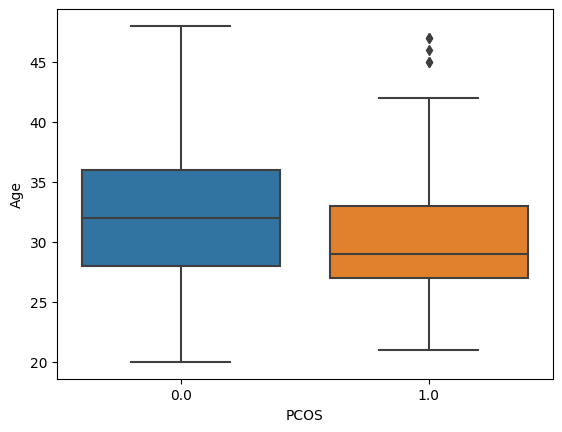

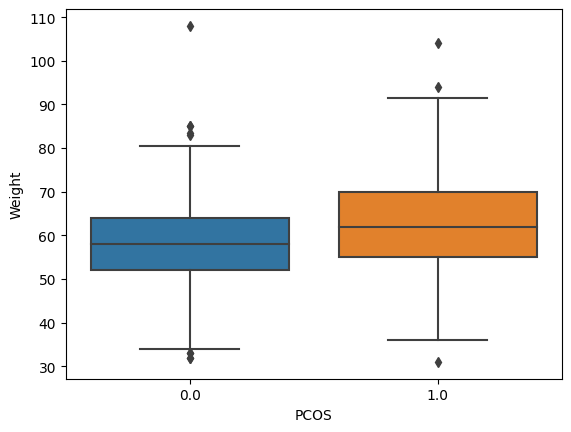

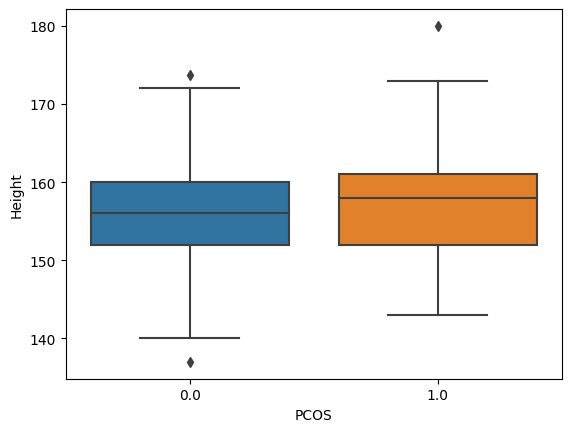

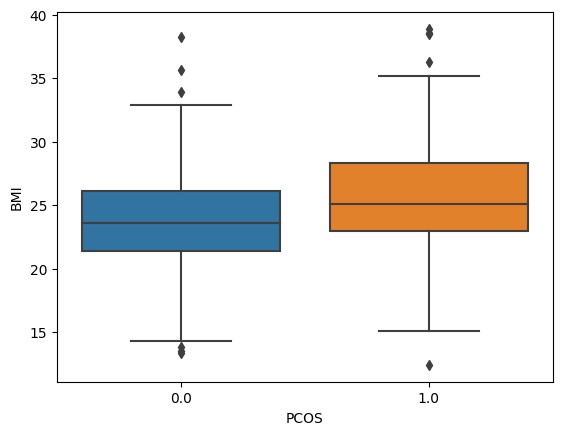

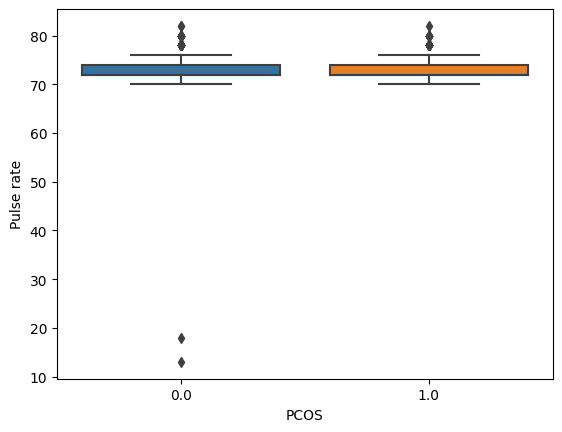

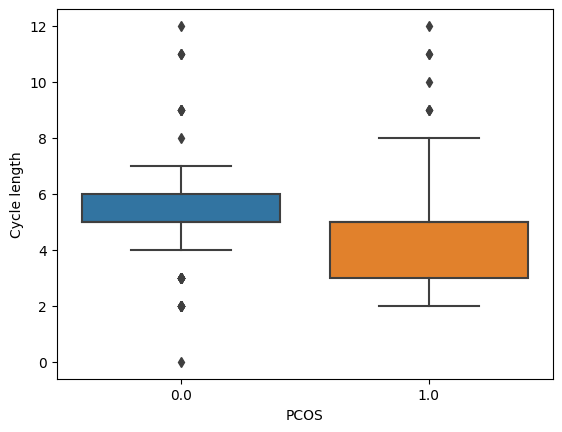

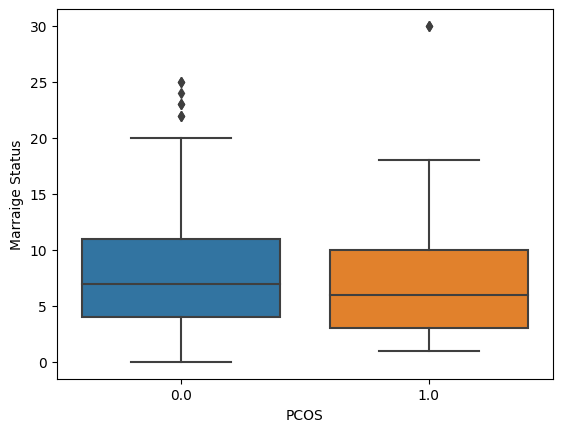

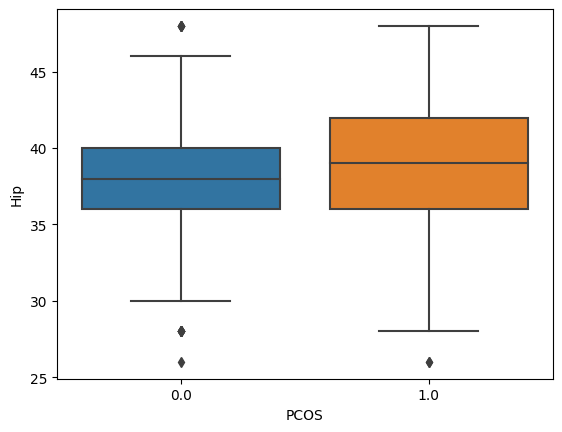

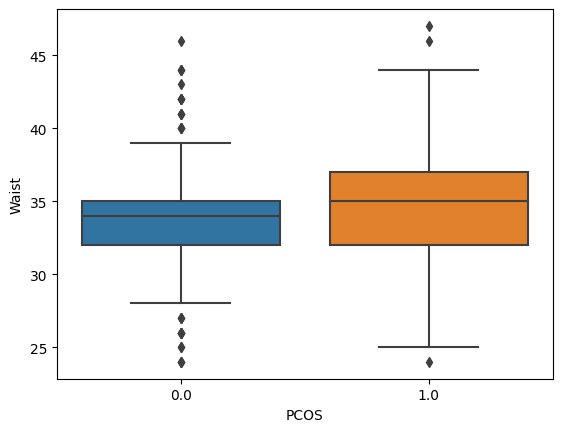

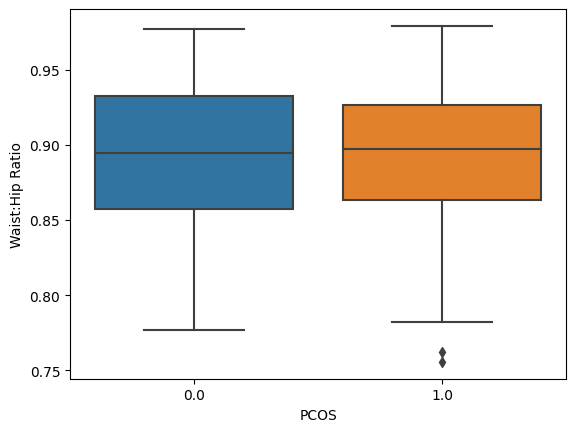

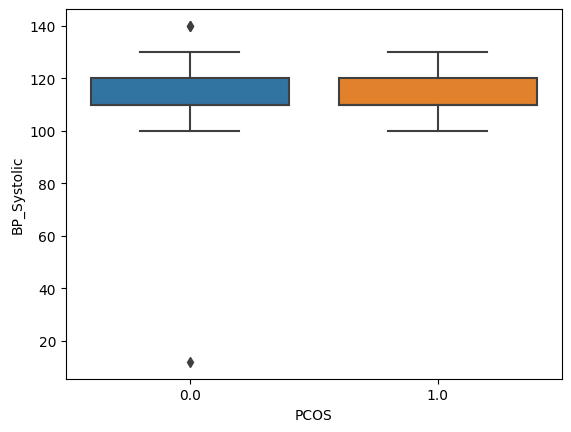

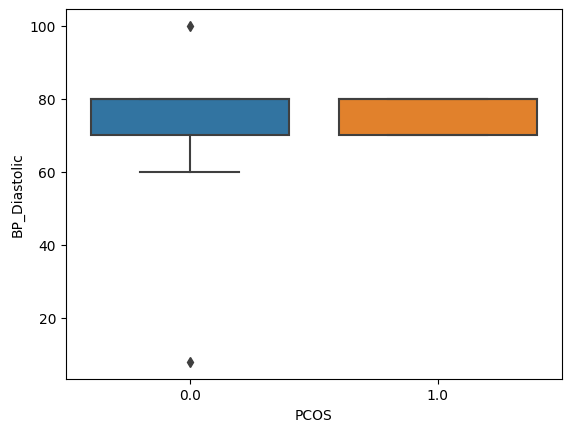

In [13]:
#다양한 값들이 나오는 칼럼들 boxplot 찍어보기
for cols in pcos_numerical:
    sns.boxplot(x="PCOS", y=cols,  data=df_PCOS)
    plt.show()

Age 는 다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요 있음  
Weight는 다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요가 있음  
Height는 다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요가 있음  
BMI다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요가 있음  
Pulse rate는 이상치 2개 제거하고 다시 찍어봄. 분포 비슷해서 의미없을듯  
Cycle length는 다른 분포가 보임. 범위 나눠서 보여줄 필요가 있음.  
Marraige Status는 거의 의미가 없는 데이터로 보임.  
Hip은 다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요가 있음  
Waist는 다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요가 있음  
Waist:Hip Ratio는 거의 비슷해서 보여줄 필요가 없을듯.  
BP_Systolic은 거의 비슷해서 보여줄 필요 없음  
BP_Diastolic은 거의 비슷해서 보여줄 필요 없음  

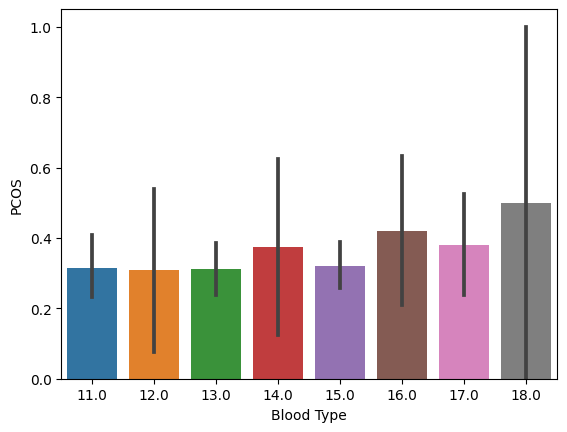

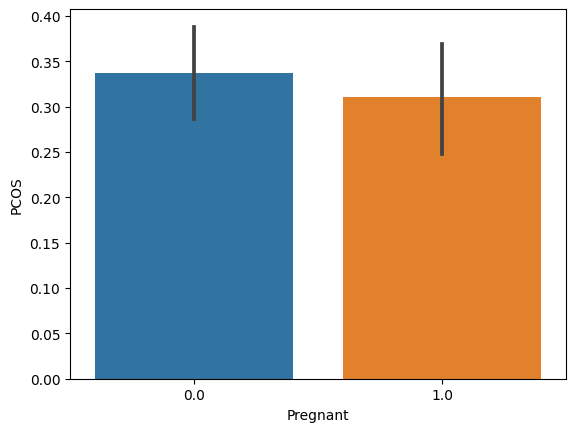

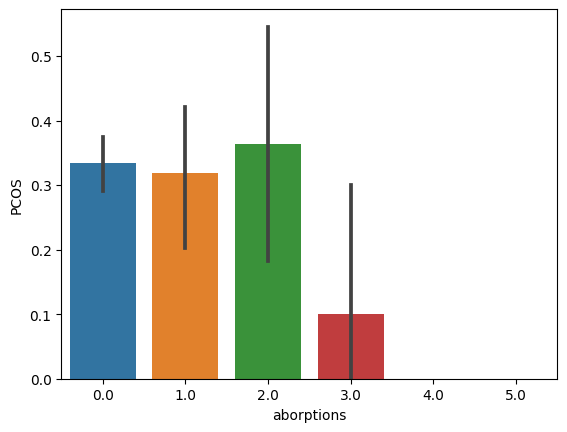

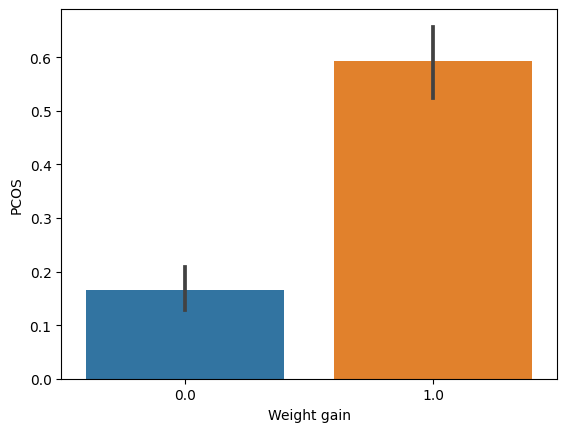

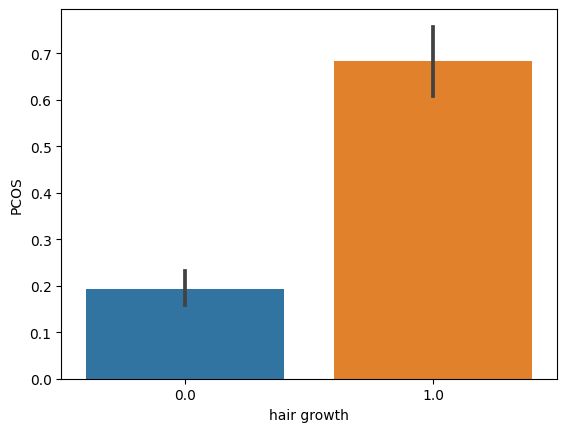

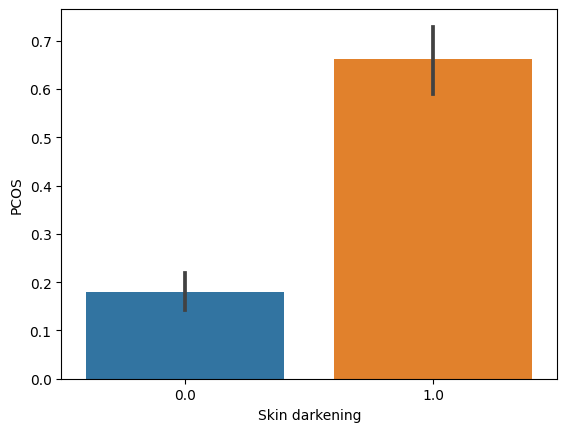

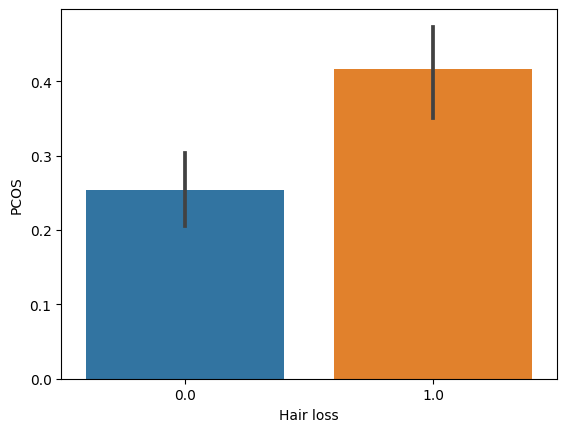

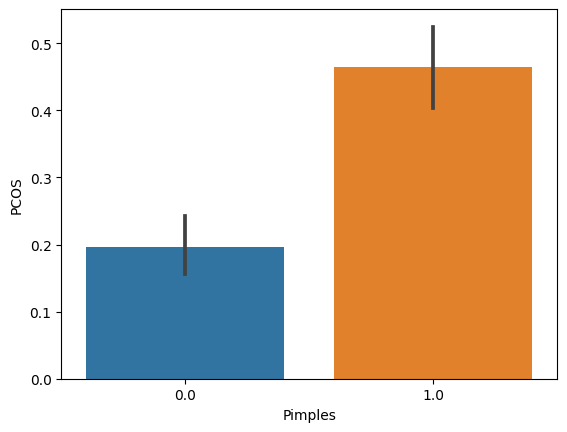

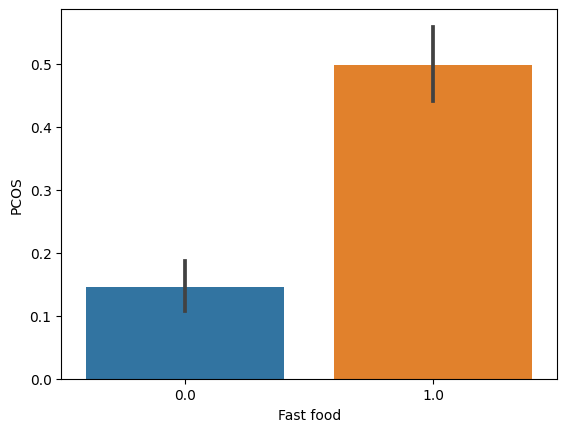

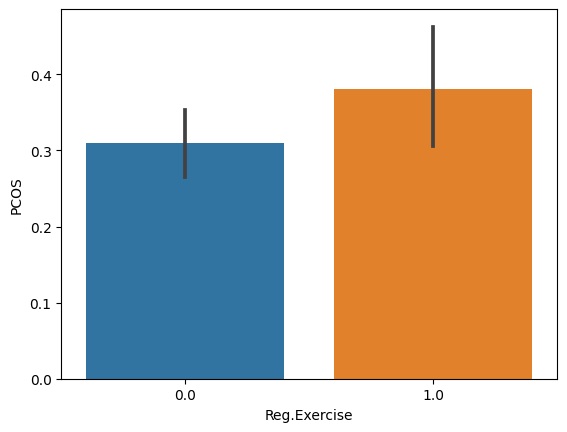

In [14]:
#범주형 데이터
for x in pcos_categiry[1:]:
    sns.barplot(x= x, y = "PCOS", data = df_PCOS)
    plt.show()

Blood Type 의미 없어보임  
Pregnant 의미 없어보임  
aborptions 의미 없어보임  
weight gain 의미 있음  
hair growth 의미 있음  
Skin darkening 의미 있음  
Hair loss 의미있음  
Pimples 의미 있음  
Fast food 의미 있음  
Reg.Exercise 의미 없어보임.  

In [15]:
import seaborn as sns

sns.swarmplot(
    data=pcos_age,
    x='PCOS',
    y='Age'
    )
plt.show()

NameError: name 'pcos_age' is not defined

In [ ]:
pcos_age

### 단계적 선택법으로 불필요한 칼럼들 제거
- R을 이용한다(stepwise)


#### 칼럼의 갯수가 너무 많아 단계별 선택법을 통해 필요없는 칼럼을 제거. 이 과정은 R에서 진행
- 'PCOS','Age','Pulse rate','Cycle length','aborptions','Weight gain','hair growth','Skin darkening','Pimples','Fast food'
- 이 칼럼들만 사용

In [ ]:
df_stepwise =  df_PCOS[['PCOS','Age','Pulse rate','Cycle length','aborptions','Weight gain','hair growth','Skin darkening','Pimples','Fast food']]
df_stepwise.head(3)

In [ ]:
df_stepwise.shape

In [ ]:
df_stepwise.info()

# 최종 데이터 저장하기

In [ ]:
df_stepwise.to_csv('../Data/pcos_stepwise.csv',index=None)